## Clustering CB

### Import Data

In [1]:
import pandas as pd 

final_df = pd.read_csv('players_rating_potential_database.csv')

In [2]:
final_df_cb = final_df[final_df["Position"] == "Center Backs"].copy()

In [3]:
final_df_cb

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential
0,Amir Rrahmani,1994-02-24,SerieA,Napoli,Right,Kosovo,Center Backs,3406,0.03,0.08,...,0.00,0.03,3.57,3.28,1.45,69.3,1838,31.0,81.050510,81.050510
1,Alessandro Buongiorno,1999-06-06,SerieA,Napoli,Left,Italy,Center Backs,1924,0.05,0.00,...,0.00,0.00,3.93,2.01,0.98,67.2,1838,26.0,77.809277,77.809277
2,Alessandro Bastoni,1999-04-13,SerieA,Internazionale,Left,Italy,Center Backs,2401,0.04,0.19,...,0.00,0.00,3.60,1.65,0.90,64.7,1933,26.0,81.883278,82.193944
3,Francesco Acerbi,1988-02-10,SerieA,Internazionale,Left,Italy,Center Backs,1710,0.00,0.05,...,0.00,0.00,3.26,3.21,1.58,67.0,1933,37.0,79.861999,79.861999
4,Stefan de Vrij,1992-02-05,SerieA,Internazionale,Right,Netherlands,Center Backs,1726,0.16,0.00,...,0.00,0.00,3.44,3.39,1.98,63.1,1933,33.0,80.175203,80.175203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Dara O'Shea,1999-03-04,PremierLeague,Ipswich Town,Right,Republic of Ireland,Center Backs,3122,0.00,0.06,...,0.00,0.00,3.17,3.29,2.45,57.3,1797,26.0,76.844098,76.844098
445,Taylor Harwood-Bellis,2002-01-30,PremierLeague,Southampton,Right,England,Center Backs,2825,0.03,0.00,...,0.00,0.00,3.92,2.01,1.56,56.3,1782,23.0,77.686309,80.441063
446,Jan Bednarek,1996-04-12,PremierLeague,Southampton,Right,Poland,Center Backs,2531,0.07,0.00,...,0.04,0.00,3.77,2.52,1.32,65.7,1782,29.0,77.423588,77.423588
447,Jack Stephens,1994-01-27,PremierLeague,Southampton,Right,England,Center Backs,1389,0.06,0.00,...,0.06,0.00,2.85,0.39,0.65,37.5,1782,31.0,75.768843,75.768843


In [4]:
# 2. Define target and input features //
meta_cols = ['Player', 'Position', 'Club', 'Birthdate'] 

center_backs_features = [
    'Goals', 'Assists',                                # Set piece threat
    'Pass Completion %', 'Pass Completion % (Long)',   # Build-up reliability
    'Progressive Passes', 'Progressive Passing Distance', # Line-breaking passes
    'Passes Attempted (Long)',                         # Direct balls out of defense
    'Blocks', 'Shots Blocked',                         # Shot prevention
    'Tackles (Def 3rd)', 'Tackles (Mid 3rd)',          # Defensive duels in own/mid half
    'Tkl+Int',                                         # Ball-winning
    'Aerials Won',                                     # Dominance in the air
    'Ball Recoveries',                                 # Sweeping up behind line
    'Fouls Committed', 'Yellow Cards', 'Red Cards',    # Discipline and aggression
    'Touches (Def 3rd)',                               # Involvement in deep build-up
    'GCA (Defensive Action)',                          # Direct defensive goal involvement
    'SCA (Defensive Action)'                          # Direct defensive shot prevention
]

In [5]:
df_meta = final_df_cb[meta_cols]

X = final_df_cb[center_backs_features]

X

,Goals,Assists,Pass Completion %,Pass Completion % (Long),Progressive Passes,Progressive Passing Distance,Passes Attempted (Long),Blocks,Shots Blocked,Tackles (Def 3rd),Tackles (Mid 3rd),Tkl+Int,Aerials Won,Ball Recoveries,Fouls Committed,Yellow Cards,Red Cards,Touches (Def 3rd),GCA (Defensive Action),SCA (Defensive Action)
0,0.03,0.08,91.0,72.0,4.97,454.78,10.75,1.14,0.69,0.50,0.50,1.74,3.28,3.57,1.11,0.05,0.00,35.80,0.0,0.00
1,0.05,0.00,90.8,59.6,3.84,297.65,4.86,1.40,0.84,1.22,0.56,3.46,2.01,3.93,0.80,0.09,0.00,30.64,0.0,0.00
2,0.04,0.19,88.4,66.9,6.07,422.64,12.67,0.94,0.49,0.97,0.52,2.55,1.65,3.60,1.65,0.22,0.04,30.89,0.0,0.08
3,0.00,0.05,92.5,78.3,3.26,324.11,5.58,1.16,0.84,0.84,0.37,2.58,3.21,3.26,0.58,0.00,0.00,34.11,0.0,0.00
4,0.16,0.00,93.3,73.2,3.96,405.26,5.06,0.99,0.57,0.63,0.26,2.14,3.39,3.44,0.47,0.10,0.00,36.14,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0.00,0.06,78.2,49.3,2.31,304.10,7.78,1.79,1.44,0.95,0.37,2.36,3.29,3.17,0.61,0.17,0.00,33.70,0.0,0.03
445,0.03,0.00,87.4,64.0,3.98,401.16,8.67,2.07,1.37,0.41,0.38,1.85,2.01,3.92,1.12,0.29,0.00,36.89,0.0,0.03
446,0.07,0.00,92.7,76.6,2.13,317.36,4.87,1.67,1.28,0.82,0.46,3.27,2.52,3.77,1.10,0.25,0.00,38.79,0.0,0.00
447,0.06,0.00,92.0,83.1,4.08,282.89,4.21,1.30,0.84,1.62,0.58,3.05,0.39,2.85,0.84,0.13,0.13,29.87,0.0,0.00


### PCA

In [6]:
# Now ready for scaling and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components explaining 95% variance: {X_pca.shape[1]}")

Number of components explaining 95% variance: 15


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def plot_kmeans_metrics(X, k_range):
    inertias = []
    silhouettes = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)

        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    # Plot Inertia (WCSS)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, marker='o')
    plt.title('Within-Cluster Sum of Squares')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.grid(True)

    # Plot Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouettes, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return inertias, silhouettes

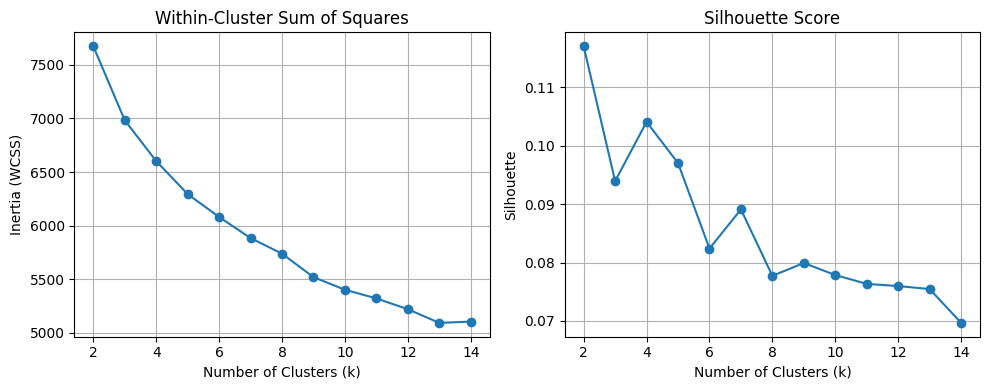

In [8]:
k_range = range(2, 15)
inertias, silhouettes = plot_kmeans_metrics(X_pca, k_range)

In [9]:
final_kmeans = KMeans(n_clusters=8, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_pca)

X = X.copy()  # Make an explicit copy if X came from slicing
X['cluster'] = cluster_labels

### TSNE & UMAP

In [10]:
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_umap(X, cluster_labels, df_meta, n_neighbors=15, min_dist=0.1):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    X_umap = reducer.fit_transform(X)

    df_umap = pd.DataFrame(X_umap, columns=["UMAP-1", "UMAP-2"])
    df_umap['Cluster'] = cluster_labels
    df_umap['Player'] = df_meta['Player'].values
    df_umap['Position'] = df_meta['Position'].values

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_umap, x='UMAP-1', y='UMAP-2', hue='Cluster', palette='tab10', s=60, alpha=0.8)
    plt.title('UMAP Representation of Player Clusters')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_umap


/Users/ghalichraibi/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


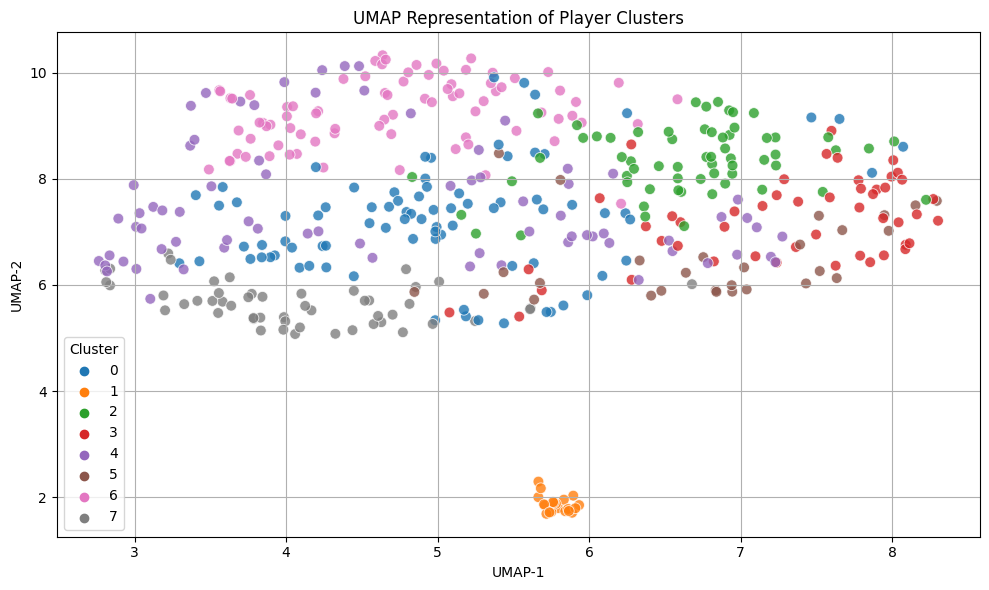

In [11]:
df_umap = plot_umap(X_pca, cluster_labels, df_meta)

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_tsne_tuned(X_pca, cluster_labels, df_meta, perplexity=40, learning_rate=200, n_iter=1000):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate,
                n_iter=n_iter, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X_pca)

    df_tsne = pd.DataFrame(X_tsne, columns=["TSNE-1", "TSNE-2"])
    df_tsne['Cluster'] = cluster_labels
    df_tsne['Player'] = df_meta['Player'].values
    df_tsne['Position'] = df_meta['Position'].values

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_tsne, x='TSNE-1', y='TSNE-2', hue='Cluster', palette='tab10', s=60, alpha=0.8)
    plt.title('t-SNE (Tuned) Representation of Player Clusters')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_tsne

/Users/ghalichraibi/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


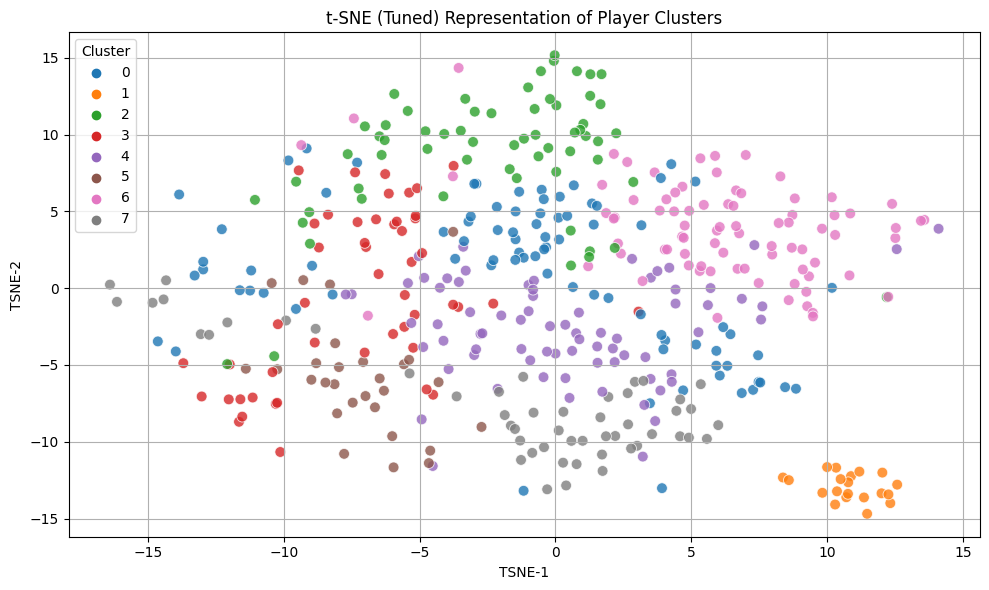

In [13]:
df_tsne = plot_tsne_tuned(X_pca, cluster_labels, df_meta, perplexity=40, learning_rate=300)

### Playstyle defintion

In [14]:
final_df_cb["Cluster"] = cluster_labels

final_df_cb

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster
0,Amir Rrahmani,1994-02-24,SerieA,Napoli,Right,Kosovo,Center Backs,3406,0.03,0.08,...,0.03,3.57,3.28,1.45,69.3,1838,31.0,81.050510,81.050510,7
1,Alessandro Buongiorno,1999-06-06,SerieA,Napoli,Left,Italy,Center Backs,1924,0.05,0.00,...,0.00,3.93,2.01,0.98,67.2,1838,26.0,77.809277,77.809277,3
2,Alessandro Bastoni,1999-04-13,SerieA,Internazionale,Left,Italy,Center Backs,2401,0.04,0.19,...,0.00,3.60,1.65,0.90,64.7,1933,26.0,81.883278,82.193944,7
3,Francesco Acerbi,1988-02-10,SerieA,Internazionale,Left,Italy,Center Backs,1710,0.00,0.05,...,0.00,3.26,3.21,1.58,67.0,1933,37.0,79.861999,79.861999,4
4,Stefan de Vrij,1992-02-05,SerieA,Internazionale,Right,Netherlands,Center Backs,1726,0.16,0.00,...,0.00,3.44,3.39,1.98,63.1,1933,33.0,80.175203,80.175203,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Dara O'Shea,1999-03-04,PremierLeague,Ipswich Town,Right,Republic of Ireland,Center Backs,3122,0.00,0.06,...,0.00,3.17,3.29,2.45,57.3,1797,26.0,76.844098,76.844098,6
445,Taylor Harwood-Bellis,2002-01-30,PremierLeague,Southampton,Right,England,Center Backs,2825,0.03,0.00,...,0.00,3.92,2.01,1.56,56.3,1782,23.0,77.686309,80.441063,0
446,Jan Bednarek,1996-04-12,PremierLeague,Southampton,Right,Poland,Center Backs,2531,0.07,0.00,...,0.00,3.77,2.52,1.32,65.7,1782,29.0,77.423588,77.423588,6
447,Jack Stephens,1994-01-27,PremierLeague,Southampton,Right,England,Center Backs,1389,0.06,0.00,...,0.00,2.85,0.39,0.65,37.5,1782,31.0,75.768843,75.768843,3


In [15]:
cluster_summary = X.copy()
summary_stats = cluster_summary.groupby('cluster').agg(['mean'])

In [16]:
mean_per_cluster = summary_stats.xs('mean', axis=1, level=1)
std_across_clusters = mean_per_cluster.std(axis=0)

summary_stats

,Goals,Assists,Pass Completion %,Pass Completion % (Long),Progressive Passes,Progressive Passing Distance,Passes Attempted (Long),Blocks,Shots Blocked,Tackles (Def 3rd),Tackles (Mid 3rd),Tkl+Int,Aerials Won,Ball Recoveries,Fouls Committed,Yellow Cards,Red Cards,Touches (Def 3rd),GCA (Defensive Action),SCA (Defensive Action)
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,,,,,,,
0,0.031928,0.020602,86.037349,59.802410,3.587349,391.634819,9.553494,1.350000,0.867711,0.968434,0.431687,2.664940,2.310964,3.946024,1.030241,0.253976,0.017108,37.094578,0.0000,0.013855
1,0.042000,0.042500,86.125000,60.515000,3.883500,339.182000,7.992000,1.142000,0.653500,0.854000,0.601500,2.671000,2.001000,3.908500,0.943500,0.184000,0.006000,30.913000,0.0435,0.057000
2,0.040806,0.032581,77.482258,49.098387,2.823871,255.286613,7.843871,1.399677,0.776129,1.084839,0.586290,3.152419,2.987419,3.446774,1.159355,0.277097,0.019355,27.442581,0.0000,0.017097
3,0.029592,0.028367,85.708163,57.169388,3.706327,298.752857,6.247551,1.228980,0.561633,1.340612,0.754694,3.477959,1.794082,4.265918,1.153469,0.196735,0.010408,29.208163,0.0000,0.015510
4,0.032838,0.015405,87.831081,61.637838,3.379865,309.149865,6.582432,0.949054,0.558378,0.751351,0.391892,2.146216,1.819865,3.498649,0.839054,0.162432,0.009730,30.120946,0.0000,0.015946
5,0.073571,0.020000,84.700000,59.875000,4.259286,327.565714,7.661071,1.113929,0.588929,1.083571,0.638214,3.018571,2.137143,3.921786,0.930714,0.204643,0.022143,28.903571,0.0000,0.113929
6,0.068415,0.015366,85.312195,56.965854,2.217805,282.520366,7.227561,1.404634,0.997317,0.738659,0.308537,2.072683,2.634634,2.994390,0.809878,0.182805,0.009634,33.750488,0.0000,0.007073
7,0.067647,0.037843,90.509804,69.280392,5.672549,470.458627,9.312745,0.957255,0.527647,0.801569,0.532549,2.516667,2.298824,4.767843,0.856078,0.183725,0.009412,35.071765,0.0000,0.017843


In [17]:
summary_stats.to_excel(('cluster_summary_cb_vf.xlsx'), index=True)

Top players per Cluster

In [18]:
def top_players_per_cluster(df, rating_col='Rating', cluster_col='Cluster', top_n=10):
    top_players = (
        df.sort_values(by=[cluster_col, rating_col], ascending=[True, False])
          .groupby(cluster_col)
          .head(top_n)
          .reset_index(drop=True)
    )
    return top_players[['Player', 'Position', 'Club', cluster_col, rating_col]]


In [19]:
top_10_per_cluster = top_players_per_cluster(final_df_cb, rating_col='Rating', cluster_col='Cluster', top_n=10)
top_10_per_cluster

,Player,Position,Club,Cluster,Rating
0,Jannik Vestergaard,Center Backs,Leicester City,0,78.824334
1,José María Giménez,Center Backs,Atlético Madrid,0,78.657823
2,Clément Lenglet,Center Backs,Atlético Madrid,0,78.537894
3,Dean Huijsen,Center Backs,Bournemouth,0,78.502894
4,Harry Souttar,Center Backs,Leicester City,0,77.995817
...,...,...,...,...,...
75,Lucas Beraldo,Center Backs,Paris Saint-Germain,7,81.754732
76,Dayot Upamecano,Center Backs,Bayern Munich,7,81.515671
77,Kim Min-jae,Center Backs,Bayern Munich,7,81.479895
78,Amir Rrahmani,Center Backs,Napoli,7,81.050510


In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(top_10_per_cluster)

                   Player      Position                 Club  Cluster  \
0      Jannik Vestergaard  Center Backs       Leicester City        0   
1      José María Giménez  Center Backs      Atlético Madrid        0   
2         Clément Lenglet  Center Backs      Atlético Madrid        0   
3            Dean Huijsen  Center Backs          Bournemouth        0   
4           Harry Souttar  Center Backs       Leicester City        0   
5          Gernot Trauner  Center Backs            Feyenoord        0   
6   Taylor Harwood-Bellis  Center Backs          Southampton        0   
7           CJ Egan-Riley  Center Backs              Burnley        0   
8             Bruno Fuchs  Center Backs            Palmeiras        0   
9         Florian Lejeune  Center Backs       Rayo Vallecano        0   
10             Marquinhos  Center Backs  Paris Saint-Germain        1   
11        Ibrahima Konaté  Center Backs            Liverpool        1   
12            Daley Blind  Center Backs            

### Spider Charts

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === STEP 0 — Inputs ===
features =  [                              
    'npxG + xAG',
    'Passes Attempted (Long)', 'Pass Completion % (Long)',   # Build-up reliability
    'Progressive Passes', 'Progressive Passing Distance',                    # Line-breaking passes
    'Blocks',                                          # Shot prevention
    'Tkl+Int',                                         # Ball-winning
    'Aerials Won',                                     # Dominance in the air
    'Ball Recoveries',                                 # Sweeping up behind line
    'Fouls Committed',                                 # Discipline and aggression
    'Touches (Def 3rd)'                                 # Involvement in deep build-up
    ]                         

# Define custom cluster labels for each cluster index
cluster_names = {
    0: "Dominant Anchors",
    1: "Mobile Front-Foot Defenders",
    2: "Classical Defenders",
    3: "Balanced Ball-Players",
    4: "Elite Circulators",
    5: "Versatile Press Breakers",
    6: "No-Nonsense Guardians",
    7: "World-Class Hybrid Leaders"
}

# Assuming your DataFrame with 300 players is named `df_players` and has a 'Cluster' column
cluster_sizes = final_df_cb.groupby("Cluster").size()

# Build the cluster_names dictionary
cluster_names = {
    cluster: (cluster_names[cluster], size)
    for cluster, size in cluster_sizes.items()
}

# Optional: display the result
cluster_names

{0: ('Dominant Anchors', 83),
 1: ('Mobile Front-Foot Defenders', 20),
 2: ('Classical Defenders', 62),
 3: ('Balanced Ball-Players', 49),
 4: ('Elite Circulators', 74),
 5: ('Versatile Press Breakers', 28),
 6: ('No-Nonsense Guardians', 82),
 7: ('World-Class Hybrid Leaders', 51)}

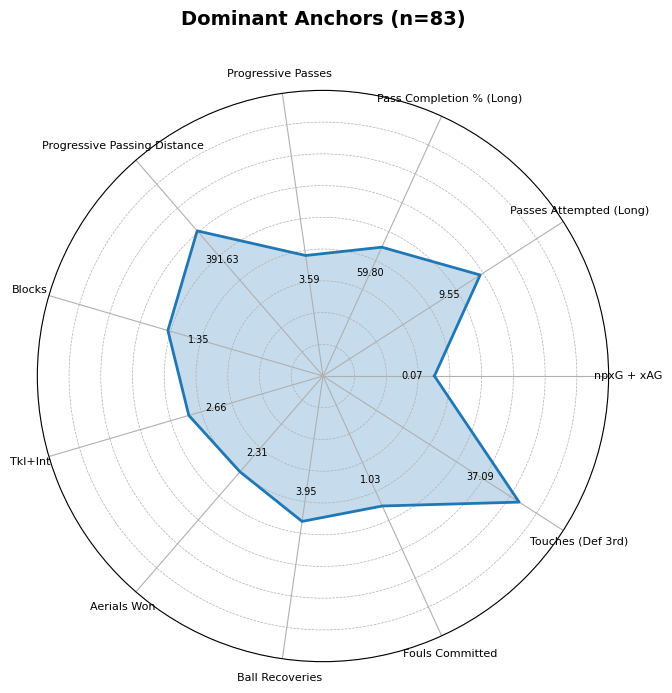

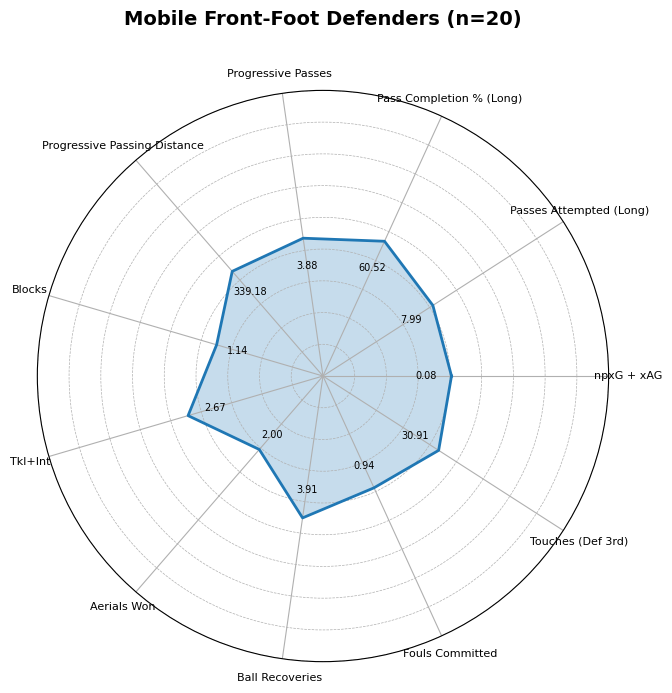

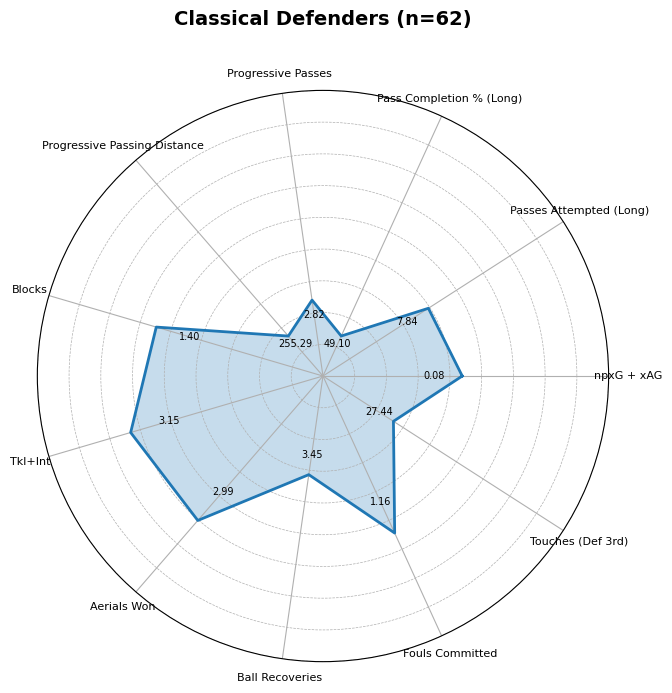

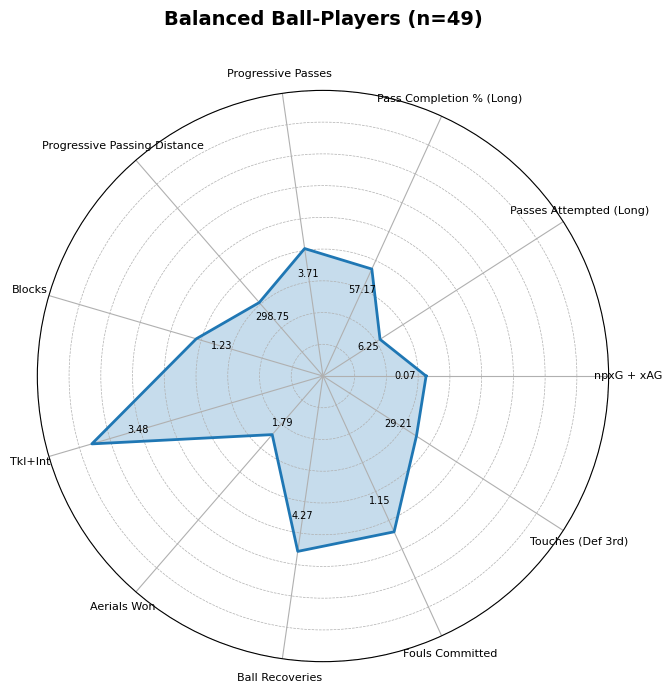

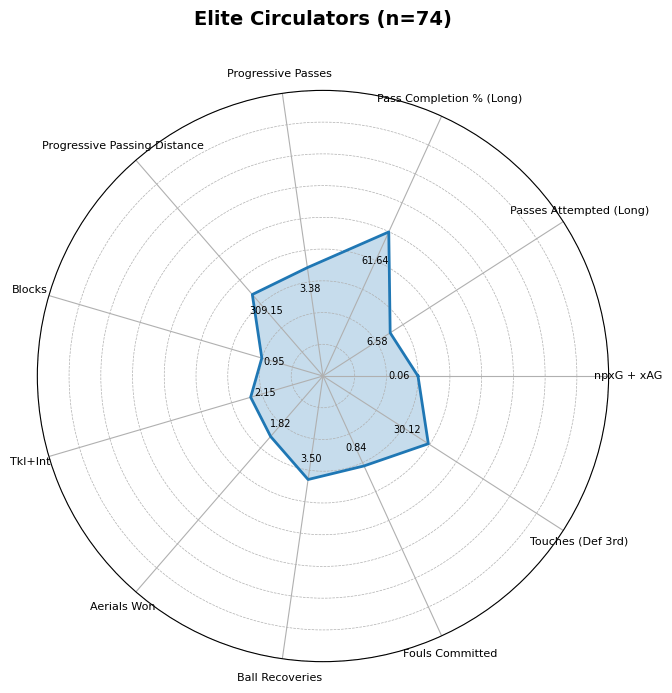

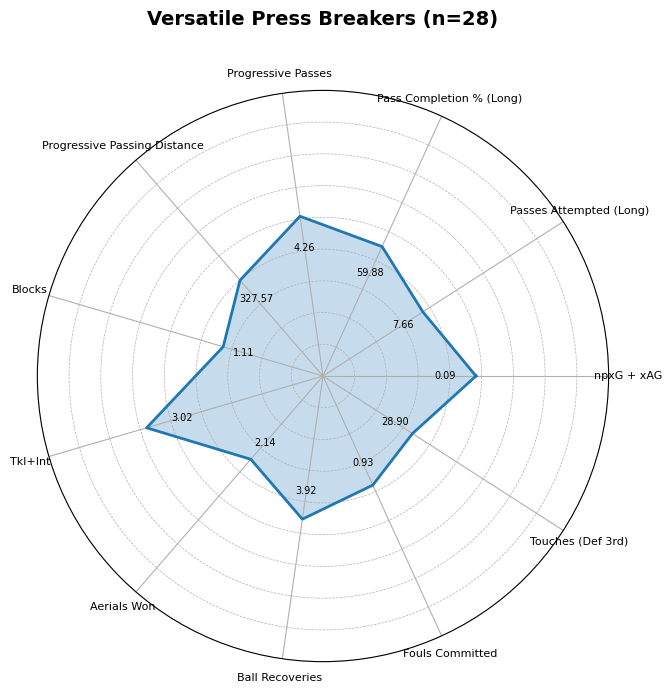

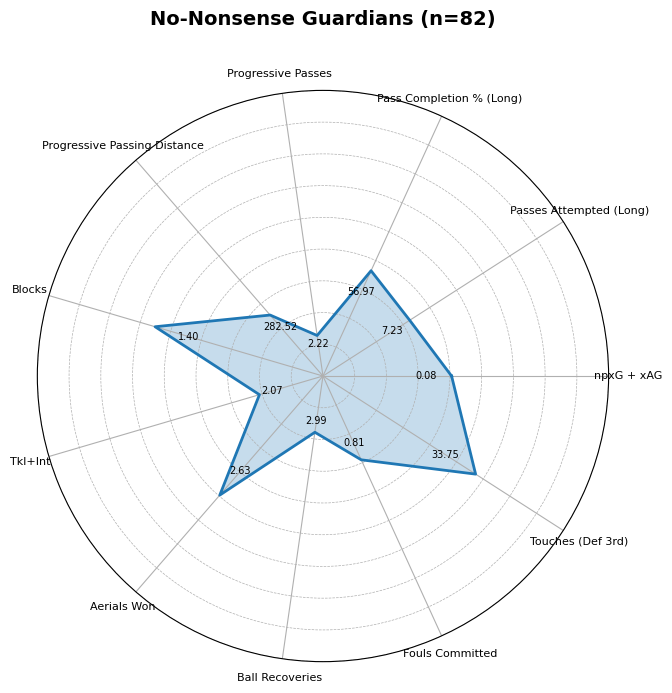

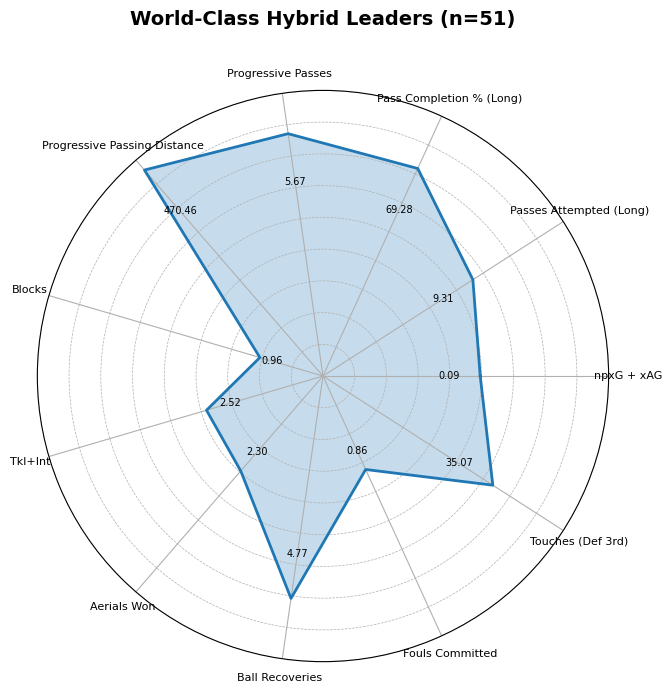

In [22]:
# === STEP 1 — Compute raw cluster means ===
raw_means = final_df_cb.groupby("Cluster")[features].mean()

# === STEP 2 — Compute 5th and 95th percentiles for full AM/W pool ===
lower_bounds = final_df_cb[features].quantile(0.05)
upper_bounds = final_df_cb[features].quantile(0.95)

# === STEP 3 — Normalize raw cluster means to build scaled radar profiles ===
range_vals = (upper_bounds - lower_bounds).replace(0, 1)
scaled_means = (raw_means - lower_bounds) / range_vals
scaled_means = scaled_means.clip(0, 1)

# === STEP 4 — Radar Chart Function ===
def create_annotated_radar(scaled_row, raw_row, cluster_id, title, n_lines=10):
    labels = scaled_row.index
    stats = scaled_row.values
    raw_stats = raw_row.values

    # Close the loop
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    raw_stats = np.concatenate((raw_stats, [raw_stats[0]]))
    angles += [angles[0]]

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    # Radar plot
    ax.plot(angles, stats, linewidth=2)
    ax.fill(angles, stats, alpha=0.25)

    # Inner gridlines (no % labels)
    ax.set_yticks(np.linspace(0, 1, n_lines))
    ax.set_yticklabels([])
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

    # Axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)

    # Annotate raw values near inner vertices (85% of scaled radius)
    for angle, scaled_val, raw_val in zip(angles[:-1], stats[:-1], raw_stats[:-1]):
        radius = scaled_val * 0.8
        ax.text(
            angle, radius, f"{raw_val:.2f}",
            ha='center', va='center', fontsize=7, color='black'
        )


    # Title with cluster name and size
    cluster_label, size = cluster_names[cluster_id]
    ax.set_title(f"{cluster_label} (n={size})", size=14, weight='bold', y=1.1)

    plt.tight_layout()
    return fig


# === STEP 5 — Plot or Export Charts ===
for cluster_id in raw_means.index:
    fig = create_annotated_radar(
        scaled_row=scaled_means.loc[cluster_id],
        raw_row=raw_means.loc[cluster_id],
        cluster_id=cluster_id,
        title=cluster_names[cluster_id][0]
    )
    plt.show()


### Find similar players Cosine Similarity

In [23]:
from sklearn.preprocessing import StandardScaler

# Step 1: Extract numerical features
feature_cols = [
    'Goals', 'Assists',                                # Set piece threat
    'Pass Completion %', 'Pass Completion % (Long)',   # Build-up reliability
    'Progressive Passes', 'Progressive Passing Distance', # Line-breaking passes
    'Passes Attempted (Long)',                         # Direct balls out of defense
    'Blocks', 'Shots Blocked',                         # Shot prevention
    'Tackles (Def 3rd)', 'Tackles (Mid 3rd)',          # Defensive duels in own/mid half
    'Tkl+Int',                                         # Ball-winning
    'Aerials Won',                                     # Dominance in the air
    'Ball Recoveries',                                 # Sweeping up behind line
    'Fouls Committed', 'Yellow Cards', 'Red Cards',    # Discipline and aggression
    'Touches (Def 3rd)',                               # Involvement in deep build-up
    'GCA (Defensive Action)',                          # Direct defensive goal involvement
    'SCA (Defensive Action)'                          # Direct defensive shot prevention
]

# Step 2: Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df_cb[feature_cols])

# Step 3: Create a scaled DataFrame to use
df_scaled = final_df_cb.copy()
df_scaled[feature_cols] = X_scaled

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_similarity(player1, player2, df, feature_cols):
    vec1 = df.loc[df['Player'] == player1, feature_cols].values.flatten()
    vec2 = df.loc[df['Player'] == player2, feature_cols].values.flatten()

    similarity = cosine_similarity([vec1], [vec2])[0, 0]
    return round(similarity * 100, 2)  # Percent similarity

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_pca_cluster_similarity(player1, player2, df, df_pca, cluster_labels, boost=1.1):
    idx1 = df[df['Player'] == player1].index[0]
    idx2 = df[df['Player'] == player2].index[0]

    # Get row positions, not index values
    pos1 = df.index.get_loc(idx1)
    pos2 = df.index.get_loc(idx2)

    vec1 = df_pca[pos1]
    vec2 = df_pca[pos2]

    sim = cosine_similarity([vec1], [vec2])[0, 0] * 100
    if cluster_labels.iloc[pos1] == cluster_labels.iloc[pos2]:
        sim *= boost

    return round(min(sim, 100), 2)


In [26]:
def most_similar_players_pca_cluster(player_name, df, df_pca, cluster_labels, top_n=10, boost=1.1):
    player_index = {player: idx for idx, player in enumerate(df['Player'])}
    base_idx = player_index[player_name]
    base_vec = df_pca[base_idx]

    similarities = []
    for i, other_name in enumerate(df['Player']):
        if other_name == player_name:
            continue
        other_vec = df_pca[i]
        sim = cosine_similarity([base_vec], [other_vec])[0, 0] * 100
        if cluster_labels[i] == cluster_labels[base_idx]:
            sim *= boost
        similarities.append((other_name, round(min(sim, 100), 2)))

    return sorted(similarities, key=lambda x: -x[1])[:top_n]


In [27]:
most_similar_players_pca_cluster("William Saliba", final_df_cb, X_pca, cluster_labels)

[('Pierre Kalulu', 84.94),
 ('Mario Gila', 74.82),
 ('Lucas Beraldo', 74.32),
 ('Zaid Romero', 73.59),
 ('Niklas Süle', 72.58),
 ('Thilo Kehrer', 71.56),
 ('Aurélien Tchouaméni', 70.89),
 ('Josip Šutalo', 70.21),
 ('Mujaid Sadick', 68.7),
 ('Kim Min-jae', 68.37)]

In [30]:
final_df_cb_reset = final_df_cb.reset_index(drop=True)
cluster_labels_reset = final_df_cb["Cluster"]  # Still aligned

compute_pca_cluster_similarity("William Saliba", "William Saliba", final_df_cb_reset, X_pca, cluster_labels_reset)

100

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def compare_two_players_radar_pca(player1_name, player2_name, df, features, df_pca, cluster_labels, boost=1.1):
    # Step 1: Create index mapping once
    player_index = {player: idx for idx, player in enumerate(df['Player'])}

    # Step 2: Compute global scaling bounds
    lower_bounds = df[features].quantile(0.02)
    upper_bounds = df[features].quantile(0.98)
    range_vals = (upper_bounds - lower_bounds).replace(0, 1)

    # Step 3: Extract player stats
    p1_row = df[df["Player"] == player1_name].iloc[0]
    p2_row = df[df["Player"] == player2_name].iloc[0]
    p1_raw = p1_row[features]
    p2_raw = p2_row[features]

    # Step 4: Normalize
    p1_scaled = ((p1_raw - lower_bounds) / range_vals).clip(0, 1)
    p2_scaled = ((p2_raw - lower_bounds) / range_vals).clip(0, 1)

    # Step 5: PCA-based similarity score
    similarity_score = compute_pca_cluster_similarity(player1_name, player2_name, final_df_cb, df_pca, cluster_labels)

    # Step 6: Radar chart setup
    labels = features
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += [angles[0]]

    p1_scaled = np.append(p1_scaled.values, p1_scaled.values[0])
    p2_scaled = np.append(p2_scaled.values, p2_scaled.values[0])
    p1_raw = np.append(p1_raw.values, p1_raw.values[0])
    p2_raw = np.append(p2_raw.values, p2_raw.values[0])

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Step 7: Plot both players
    ax.plot(angles, p1_scaled, color="green", linewidth=2, label=player1_name)
    ax.fill(angles, p1_scaled, color="green", alpha=0.25)
    ax.plot(angles, p2_scaled, color="red", linewidth=2, label=player2_name)
    ax.fill(angles, p2_scaled, color="red", alpha=0.25)

    ax.set_yticks(np.linspace(0, 1, 10))
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

    # Annotate raw stats
    for angle, val1, val2, scale1, scale2 in zip(angles[:-1], p1_raw[:-1], p2_raw[:-1], p1_scaled[:-1], p2_scaled[:-1]):
        ax.text(angle, scale1 * 0.9, f"{val1:.2f}", ha='center', va='center', fontsize=7, color='green')
        ax.text(angle, scale2 * 0.9, f"{val2:.2f}", ha='center', va='center', fontsize=7, color='red')

    # Title and similarity
    ax.set_title(f"{player1_name} vs {player2_name}", size=14, weight='bold', y=1.07)
    ax.text(0.5, 1.15, f"Similarity score (PCA): {similarity_score:.2f}", transform=ax.transAxes,
        ha='center', va='center', fontsize=10, color='gray')


    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=8)
    plt.tight_layout()
    plt.show()


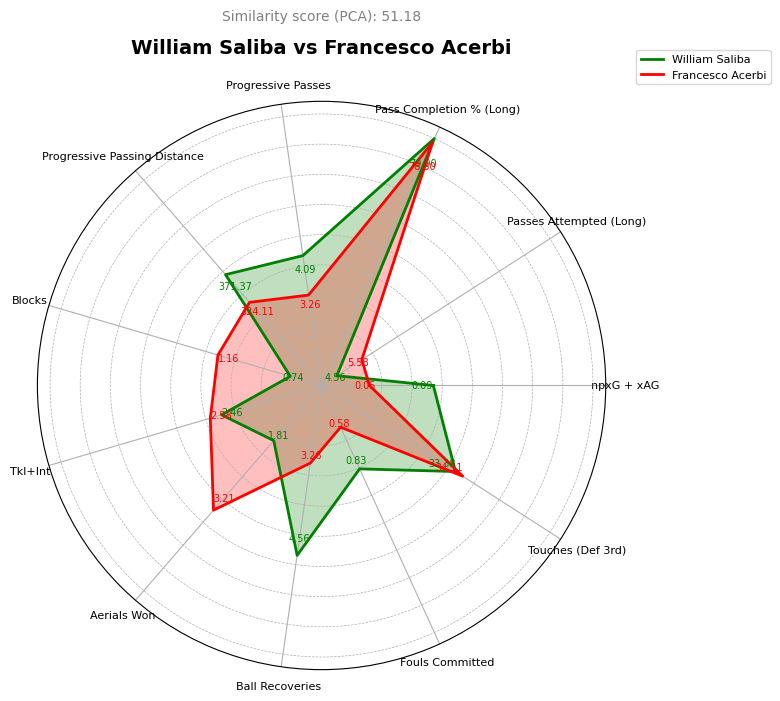

In [34]:
compare_two_players_radar_pca(
    player1_name="William Saliba",
    player2_name="Francesco Acerbi",
    df=final_df_cb,
    features=features,
    df_pca=X_pca,
    cluster_labels=final_df_cb["Cluster"]
)

### Final Naming + Export

In [35]:
final_df_cb

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster
0,Amir Rrahmani,1994-02-24,SerieA,Napoli,Right,Kosovo,Center Backs,3406,0.03,0.08,...,0.03,3.57,3.28,1.45,69.3,1838,31.0,81.050510,81.050510,7
1,Alessandro Buongiorno,1999-06-06,SerieA,Napoli,Left,Italy,Center Backs,1924,0.05,0.00,...,0.00,3.93,2.01,0.98,67.2,1838,26.0,77.809277,77.809277,3
2,Alessandro Bastoni,1999-04-13,SerieA,Internazionale,Left,Italy,Center Backs,2401,0.04,0.19,...,0.00,3.60,1.65,0.90,64.7,1933,26.0,81.883278,82.193944,7
3,Francesco Acerbi,1988-02-10,SerieA,Internazionale,Left,Italy,Center Backs,1710,0.00,0.05,...,0.00,3.26,3.21,1.58,67.0,1933,37.0,79.861999,79.861999,4
4,Stefan de Vrij,1992-02-05,SerieA,Internazionale,Right,Netherlands,Center Backs,1726,0.16,0.00,...,0.00,3.44,3.39,1.98,63.1,1933,33.0,80.175203,80.175203,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Dara O'Shea,1999-03-04,PremierLeague,Ipswich Town,Right,Republic of Ireland,Center Backs,3122,0.00,0.06,...,0.00,3.17,3.29,2.45,57.3,1797,26.0,76.844098,76.844098,6
445,Taylor Harwood-Bellis,2002-01-30,PremierLeague,Southampton,Right,England,Center Backs,2825,0.03,0.00,...,0.00,3.92,2.01,1.56,56.3,1782,23.0,77.686309,80.441063,0
446,Jan Bednarek,1996-04-12,PremierLeague,Southampton,Right,Poland,Center Backs,2531,0.07,0.00,...,0.00,3.77,2.52,1.32,65.7,1782,29.0,77.423588,77.423588,6
447,Jack Stephens,1994-01-27,PremierLeague,Southampton,Right,England,Center Backs,1389,0.06,0.00,...,0.00,2.85,0.39,0.65,37.5,1782,31.0,75.768843,75.768843,3


In [36]:
cluster_labels = {k: v[0] for k, v in cluster_names.items()}

final_df_cb["Cluster Name"] = final_df_cb["Cluster"].map(cluster_labels)

In [37]:
final_df_cb

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster,Cluster Name
0,Amir Rrahmani,1994-02-24,SerieA,Napoli,Right,Kosovo,Center Backs,3406,0.03,0.08,...,3.57,3.28,1.45,69.3,1838,31.0,81.050510,81.050510,7,World-Class Hybrid Leaders
1,Alessandro Buongiorno,1999-06-06,SerieA,Napoli,Left,Italy,Center Backs,1924,0.05,0.00,...,3.93,2.01,0.98,67.2,1838,26.0,77.809277,77.809277,3,Balanced Ball-Players
2,Alessandro Bastoni,1999-04-13,SerieA,Internazionale,Left,Italy,Center Backs,2401,0.04,0.19,...,3.60,1.65,0.90,64.7,1933,26.0,81.883278,82.193944,7,World-Class Hybrid Leaders
3,Francesco Acerbi,1988-02-10,SerieA,Internazionale,Left,Italy,Center Backs,1710,0.00,0.05,...,3.26,3.21,1.58,67.0,1933,37.0,79.861999,79.861999,4,Elite Circulators
4,Stefan de Vrij,1992-02-05,SerieA,Internazionale,Right,Netherlands,Center Backs,1726,0.16,0.00,...,3.44,3.39,1.98,63.1,1933,33.0,80.175203,80.175203,4,Elite Circulators
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Dara O'Shea,1999-03-04,PremierLeague,Ipswich Town,Right,Republic of Ireland,Center Backs,3122,0.00,0.06,...,3.17,3.29,2.45,57.3,1797,26.0,76.844098,76.844098,6,No-Nonsense Guardians
445,Taylor Harwood-Bellis,2002-01-30,PremierLeague,Southampton,Right,England,Center Backs,2825,0.03,0.00,...,3.92,2.01,1.56,56.3,1782,23.0,77.686309,80.441063,0,Dominant Anchors
446,Jan Bednarek,1996-04-12,PremierLeague,Southampton,Right,Poland,Center Backs,2531,0.07,0.00,...,3.77,2.52,1.32,65.7,1782,29.0,77.423588,77.423588,6,No-Nonsense Guardians
447,Jack Stephens,1994-01-27,PremierLeague,Southampton,Right,England,Center Backs,1389,0.06,0.00,...,2.85,0.39,0.65,37.5,1782,31.0,75.768843,75.768843,3,Balanced Ball-Players


In [39]:
# Find completely identical rows
full_duplicates = final_df_cb[final_df_cb.duplicated()]
print(f"Number of full row duplicates: {len(full_duplicates)}")
display(full_duplicates)


Number of full row duplicates: 0


,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster,Cluster Name


In [40]:
# Find rows with duplicate player names
player_duplicates = final_df_cb[final_df_cb.duplicated(subset=["Player"], keep=False)]
print(f"Number of duplicated player names: {player_duplicates['Player'].nunique()}")
display(player_duplicates.sort_values("Player"))


Number of duplicated player names: 2


,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster,Cluster Name
305,Emmanuel Agbadou,1997-06-17,Ligue1,Wolverhampton Wanderers,Right,Côte d'Ivoire,Center Backs,1260,0.00,0.0,...,6.07,1.29,0.79,62.1,1679,28.0,76.145809,76.145809,0,Dominant Anchors
434,Emmanuel Agbadou,1997-06-17,PremierLeague,Wolverhampton Wanderers,Right,Côte d'Ivoire,Center Backs,1410,0.06,0.0,...,5.30,1.66,1.28,56.5,1679,28.0,74.569625,74.569625,0,Dominant Anchors
286,Kevin Danso,1998-09-19,Ligue1,Tottenham Hotspur,Right,Austria,Center Backs,1080,0.00,0.0,...,4.92,3.42,1.75,66.1,1774,27.0,76.244176,76.244176,0,Dominant Anchors
440,Kevin Danso,1998-09-19,PremierLeague,Tottenham Hotspur,Right,Austria,Center Backs,842,0.00,0.0,...,2.89,2.24,1.28,63.6,1774,27.0,72.240552,72.240552,6,No-Nonsense Guardians


In [41]:
# Keep only the most-played entry per player
final_df_cb = final_df_cb.sort_values("Minutes", ascending=False).drop_duplicates(subset="Player")

In [42]:
final_df_cb.to_csv("final_df_cb_with_clusters.csv", index=False)